# Cтратегия взаимодействия с клиентами для сети фитнес-центров «Культурист-датасаентист»

**Описание исследования**  
На основе аналитических данных разработать стратегию для отдела по работе с клиентами для сети фитнес-центров, которая приведёт к прогнозированию и уменьшению оттока клиентов.

**Цели исследования**    

Разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;   
2) предложить меры по снижению оттока;   
3) определить другие особенности взаимодействия с клиентами.   

**Задачи исследования**  
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами

**Описание данных:**

Данные клиента за предыдущий до проверки факта оттока месяц:  
   
'gender' — пол;   
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;   
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);   
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);   
'Phone' — наличие контактного телефона;   
'Age' — возраст;   
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).   
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:   
'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);   
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)   
'Group_visits' — факт посещения групповых занятий;   
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;   
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;   
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.   
'Churn' — факт оттока в текущем месяце.   

**СОДЕРЖАНИЕ**   

[Часть 1. Загрузка данных](#section_1)   
[Часть 2. Исследовательский анализ данных (EDA)](#section_2)   
[Часть 3. Модель прогнозирования оттока клиентов](#section_3)   
[Часть 4. Кластеризация клиентов](#section_4)   
[Часть 5. Общий вывод и базовые рекомендации по работе с клиентами](#section_5)

## Загрузка данных
<a id='section_1'></a>

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.columns = [x.lower() for x in data.columns] 
display(data.head())
data.info()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Исходные данные содержат 13 признаков и 4 000 наблюдений.   
7 признаков категориальные бинарные - принимают значения 0 или 1.   
Без пропусков.

In [3]:
data.duplicated().sum()

0

Данные не содедержат дубликатов.

## Исследовательский анализ данных (EDA)
<a id='section_2'></a>

In [4]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В данных нет пропусков.    
Большая часть посетителей проживает или работает в районах расположения фитнес-центров.   
Около 31% посетителей были участниками акции "Приведи друга".   
41% посетителей посещает групповые программы.    
Средний возраст посетителей фитнес-центра по выборке - 29 лет.   

Средняя суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон - 147.   
Средний срок до окончания текущего действующего абонемента - 4,3 месяца.   
Средний лайфтайм клиентов фитнес-центров - 3,7 месяца.   
Средняя частота посещений в неделю за все время с начала действия абонемента - 2.   
Средняя частота посещений в неделю за все время с начала действия абонемента - 2.   

In [5]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По средним значениям показателей можно сделать предварительные выводы, что отток зависит от:   
    - проживания и расположения места работы в районе фитнес-центра - положительно;   
    - наличия скидки по партнёрской программе между работодателем и фитнес-центром - положительно;   
    - участия в акции "Приведи друга" - положительно;   
    - длительности абонемента - чем короче абонемент, тем больше отток;   
    - посещения групповых занятий - положительно;   
    - возраста - чем моложе человек, тем больше вероятность, что он попадёт в отток;   
    - суммарной выручки от других услуг фитнес-центра - положительно;   
    - срока до окончания текущего действующего абонемента - положительно;   
    - лайфтайма - чем длинее, тем меньше вероятность оттока;   
    - средней частоты посещений в неделю за все время с начала действия абонемента и в неделю за предыдущий месяц - положительно.

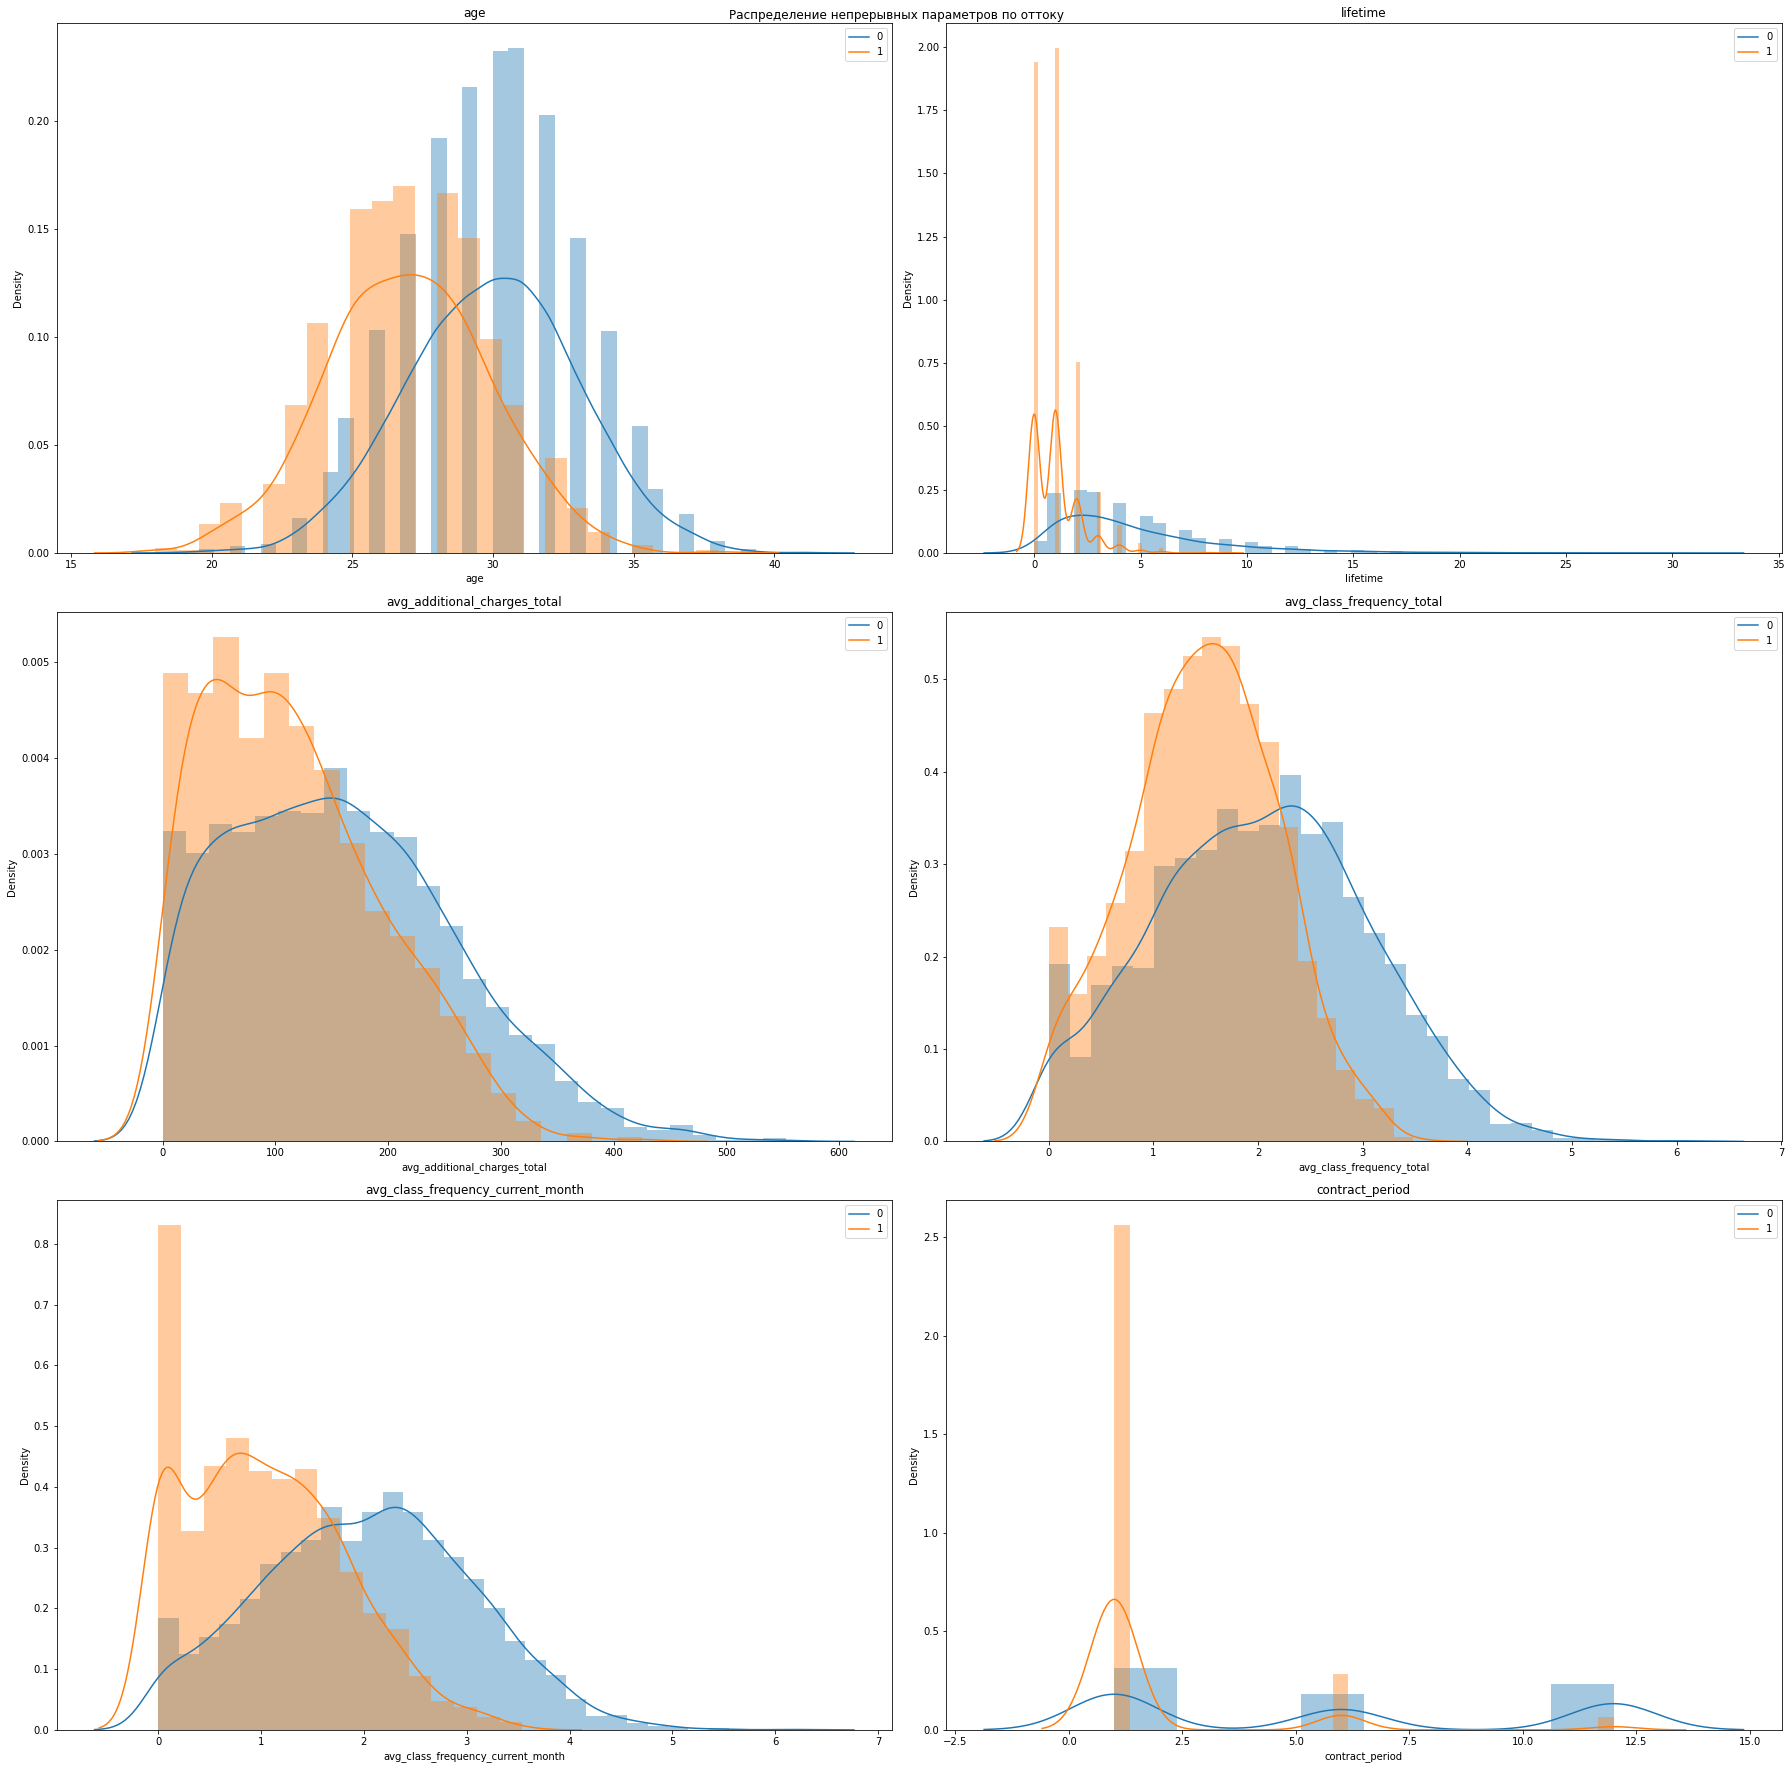

In [6]:
research_continuous = ['age', "lifetime", 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'contract_period']

col_count, row_count = 2, 3

plt.figure(figsize =(25,25))

for i, j in enumerate(research_continuous):
    for churn in data['churn'].unique():
        query = data.query('churn == @churn')
        sns.distplot(query[j], ax = plt.subplot(row_count, col_count, i+1))
        plt.title(j)
        plt.legend(data['churn'].unique())
    
plt.suptitle('Распределение непрерывных параметров по оттоку')

plt.tight_layout()

График 'Avg_class_frequency_current_month' имеет ненормальное распределение.    

Все остальные переменные распределены нормально.    
Экстремум клиентов из оттока для всех признаков смещён влево, то есть значения центрированы к минимальным значениям по всем непрерывным параметрам.

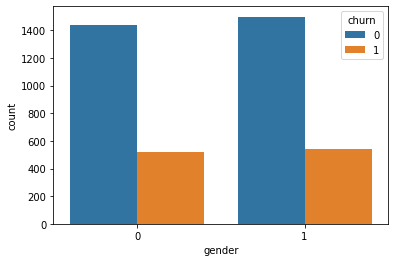

In [7]:
sns.countplot(data = data, x = 'gender', hue = 'churn')
plt.show()

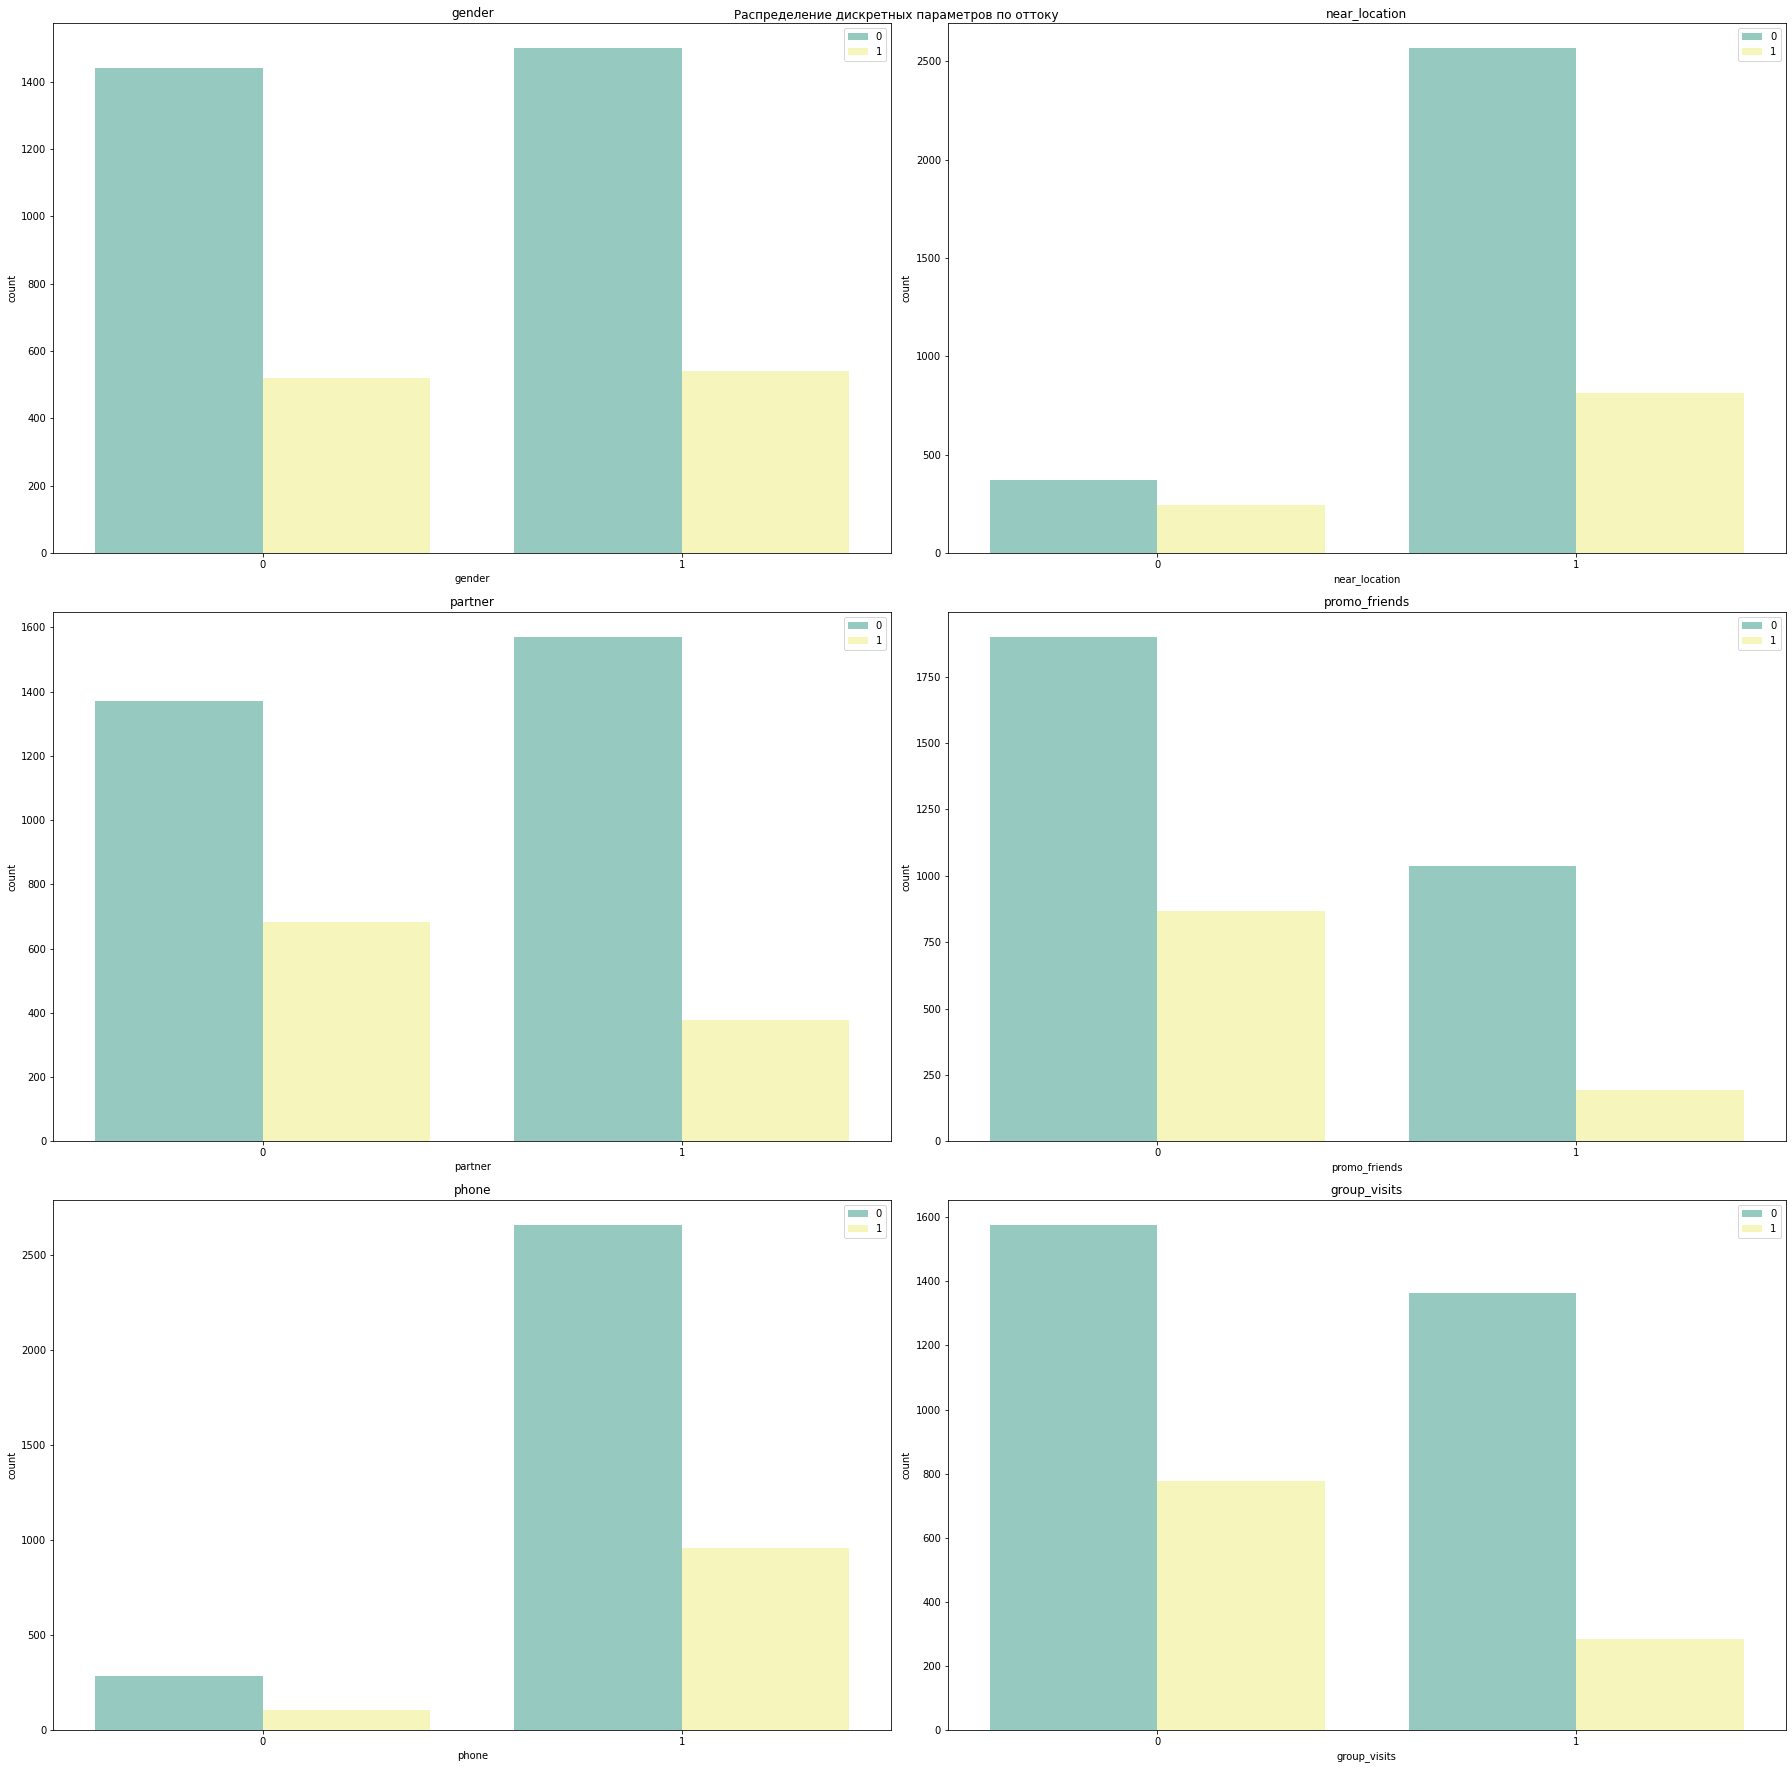

In [8]:
research_discrete = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', "group_visits"]

col_count, row_count = 2, 3

plt.figure(figsize =(25,25))

for i, j in enumerate(research_discrete):
    for churn in data['churn'].unique():
        sns.countplot(data = data, x=j, hue='churn', ax = plt.subplot(row_count, col_count, i+1), palette="Set3")
        plt.title(j)
        plt.legend(data['churn'].unique())
    
plt.suptitle('Распределение дискретных параметров по оттоку')

plt.tight_layout()

И графика распределения дискретных величин можно сделать выводы, что большая часть пользователей из базы являются действующими клиентами сети фитнес-центров.    
По полу распределение равномерное.   
Больше всего пользователей проживают или работают в районе расположения фитнес-центра.   
Участие/неучастие в партнёрской программе с компаниями: бОльшая часть действующих клиентов принимала в ней участие, бОльшая часть бывших клиентов - не принимала.    
БОльшая часть действующих клиентов не принимало участие в программе "Приведи друга", также как и бОльшая часть бывших клиентов.   
Почти все клиенты оставляют свой контактный телефон.

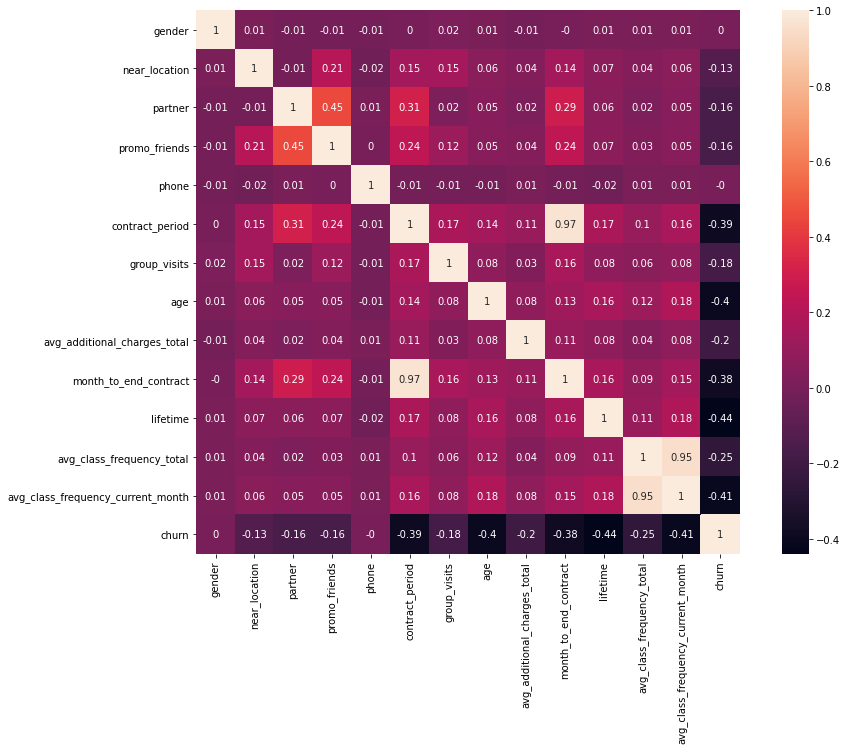

In [9]:
cm = round(data.corr(), 2)

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True, square=True)

plt.show()

Из матрицы корреляций можно сделать вывод о степени влияния признаков на отток клиентов.   
Топ-5 признаков по убыванию связи:   
- lifetime;   
- avg_class_frequency_current_month;   
- age;   
- contract_period;   
- month_to_end_contract

Между собой сильно коррелируют показатели продолжительности абонемента и количества месяцев до его окончания. 

## Модель прогнозирования оттока клиентов
<a id='section_3'></a>

In [10]:
X = data.drop(columns=['churn'])
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [11]:
models = [LogisticRegression(solver='liblinear', random_state=0), RandomForestClassifier(random_state=0)] 

def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    
for i in models:
    print()
    print(i)    
    make_prediction(i, X_train, y_train, X_test, y_test)


LogisticRegression(random_state=0, solver='liblinear')
Accuracy: 0.93
Precision: 0.89
Recall: 0.84

RandomForestClassifier(random_state=0)
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


По всем трём метрикам модель логистической регрессии показывает себя лучше.

## Кластеризация клиентов
<a id='section_4'></a>

In [12]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

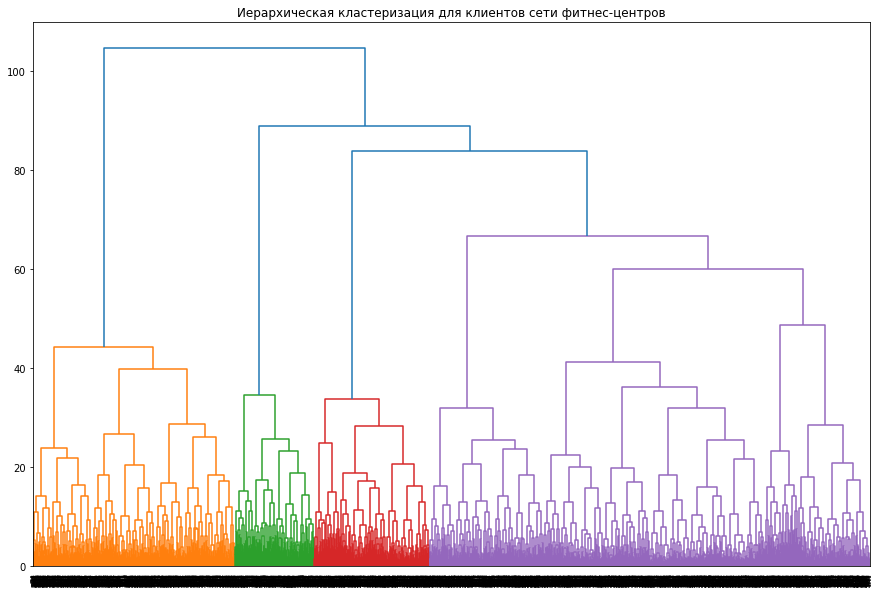

In [13]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для клиентов сети фитнес-центров')
plt.show()

Исходя из графика можно выделить 4 кластера.

In [14]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)
data['cluster_km'] = labels
clusters = data.groupby('cluster_km').mean()
display(clusters)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Какие выводы можно сделать из средних значений:   
- во второй кластер попали люди, которые живут в фитнес-центрах)))   
- бОльшая часть клиентов в первом кластере работают в партнёрских компаниях;   
- во втором кластере бОльшая часть клиентов не принимали участия в программе лояльности со скидками от друзей, в коастере 0 же наоборот;   
- в первый кластер попали клиенты не указавшие свой номер телефона, также незначительная часть таких же клиентов оказалась в кластере 4;   
- клиенты с самыми длинными контрактами попали в кластер 0, у них же больше всего времени до окончания абонементов;   
- клиенты из второго кластера реже всего посещают групповые тренировки;   
- средний возраст клиентов во всех кластерах примерно равен среднему возрасту по всей выборке клиентов фитнес-центров;   
- самый длинный лайфтайм у клиентов из 0 и 4 кластера;   
- клиенты 4 часе всего посещают фитнес-центр в количестве раз в неделю;   
- лучше всех удерживаются клиенты 2 и 3 кагорты, которые в предыдущих пунктах почти ничем не выделались.

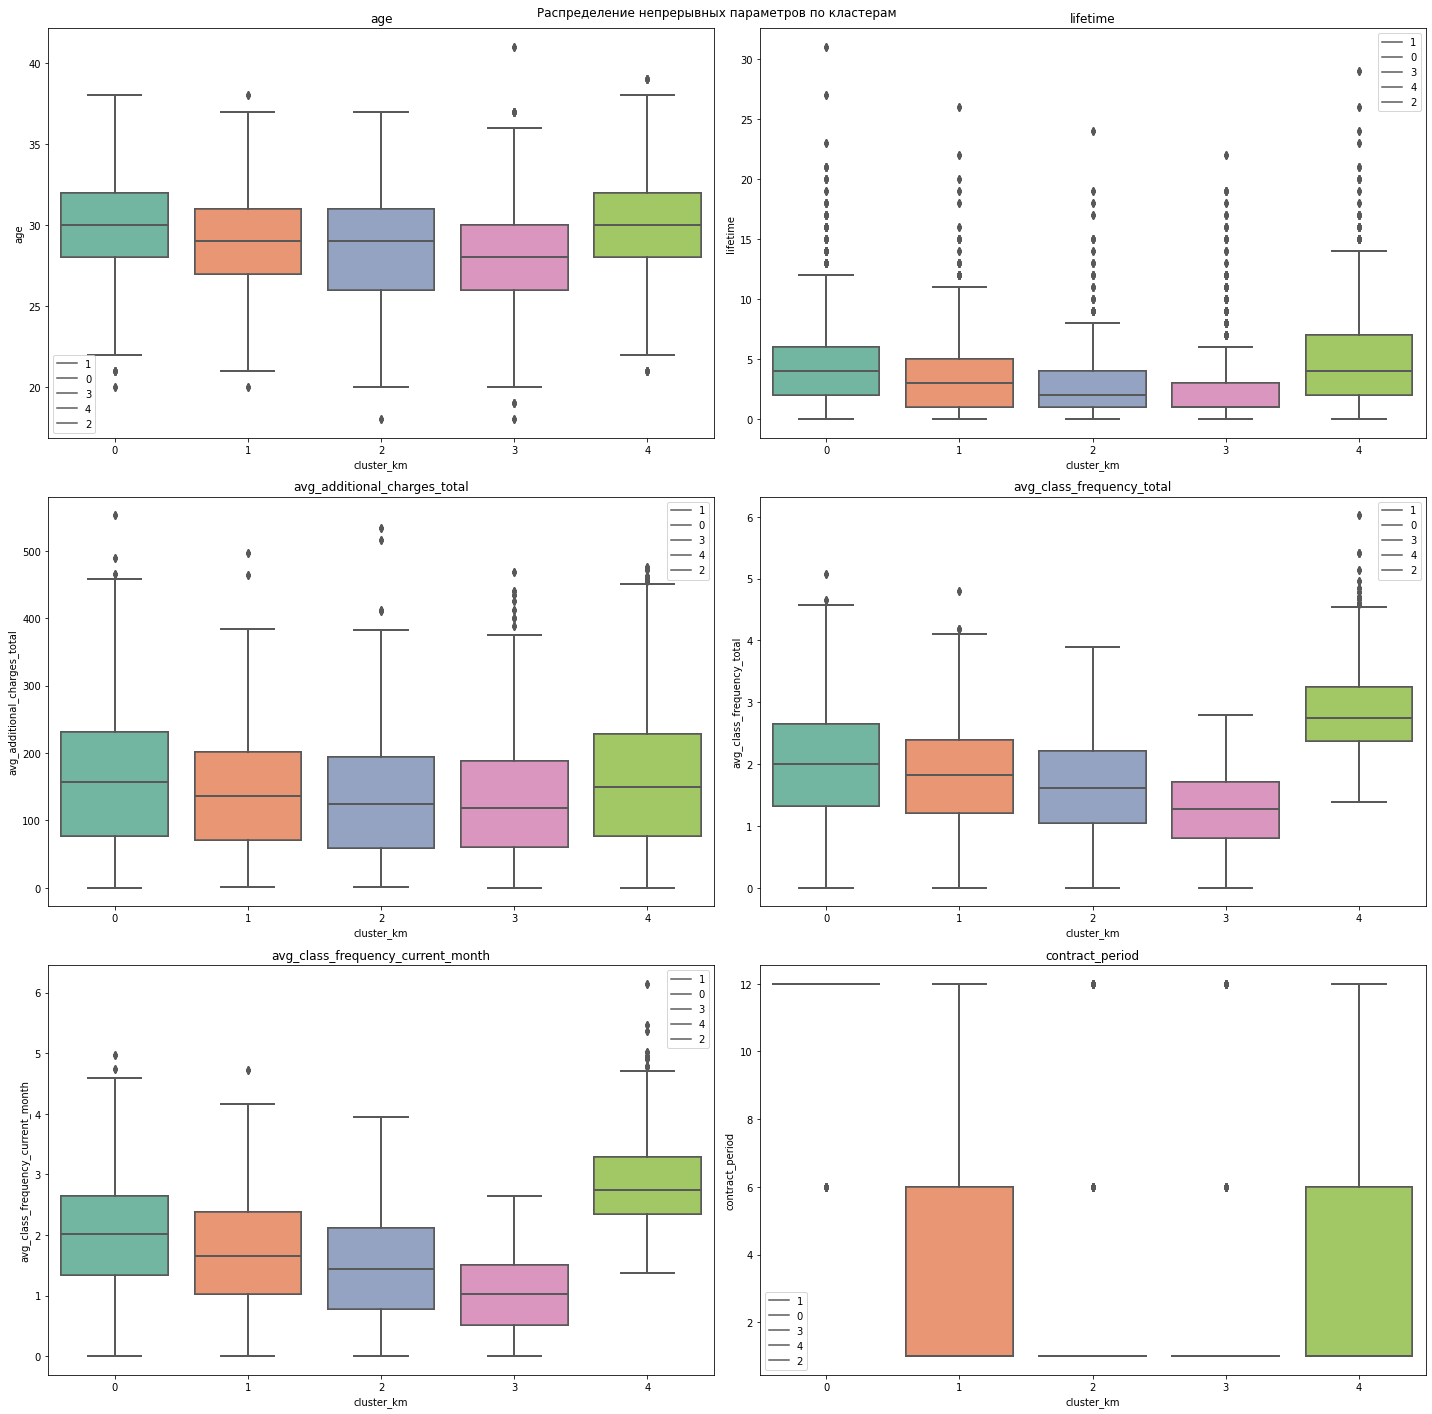

In [15]:
research_for_clusters_continious = ['age', "lifetime", 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'contract_period']

col_count, row_count = 2, 3

plt.figure(figsize =(20,20))

for i, j in enumerate(research_for_clusters_continious):
    for cluster in data['cluster_km'].unique():
        sns.boxplot(x = data['cluster_km'], y = j, data=data, ax = plt.subplot(row_count, col_count, i+1), palette="Set2")
    plt.title(j)
    plt.legend(data['cluster_km'].unique())
    
plt.suptitle('Распределение непрерывных параметров по кластерам')

plt.tight_layout()

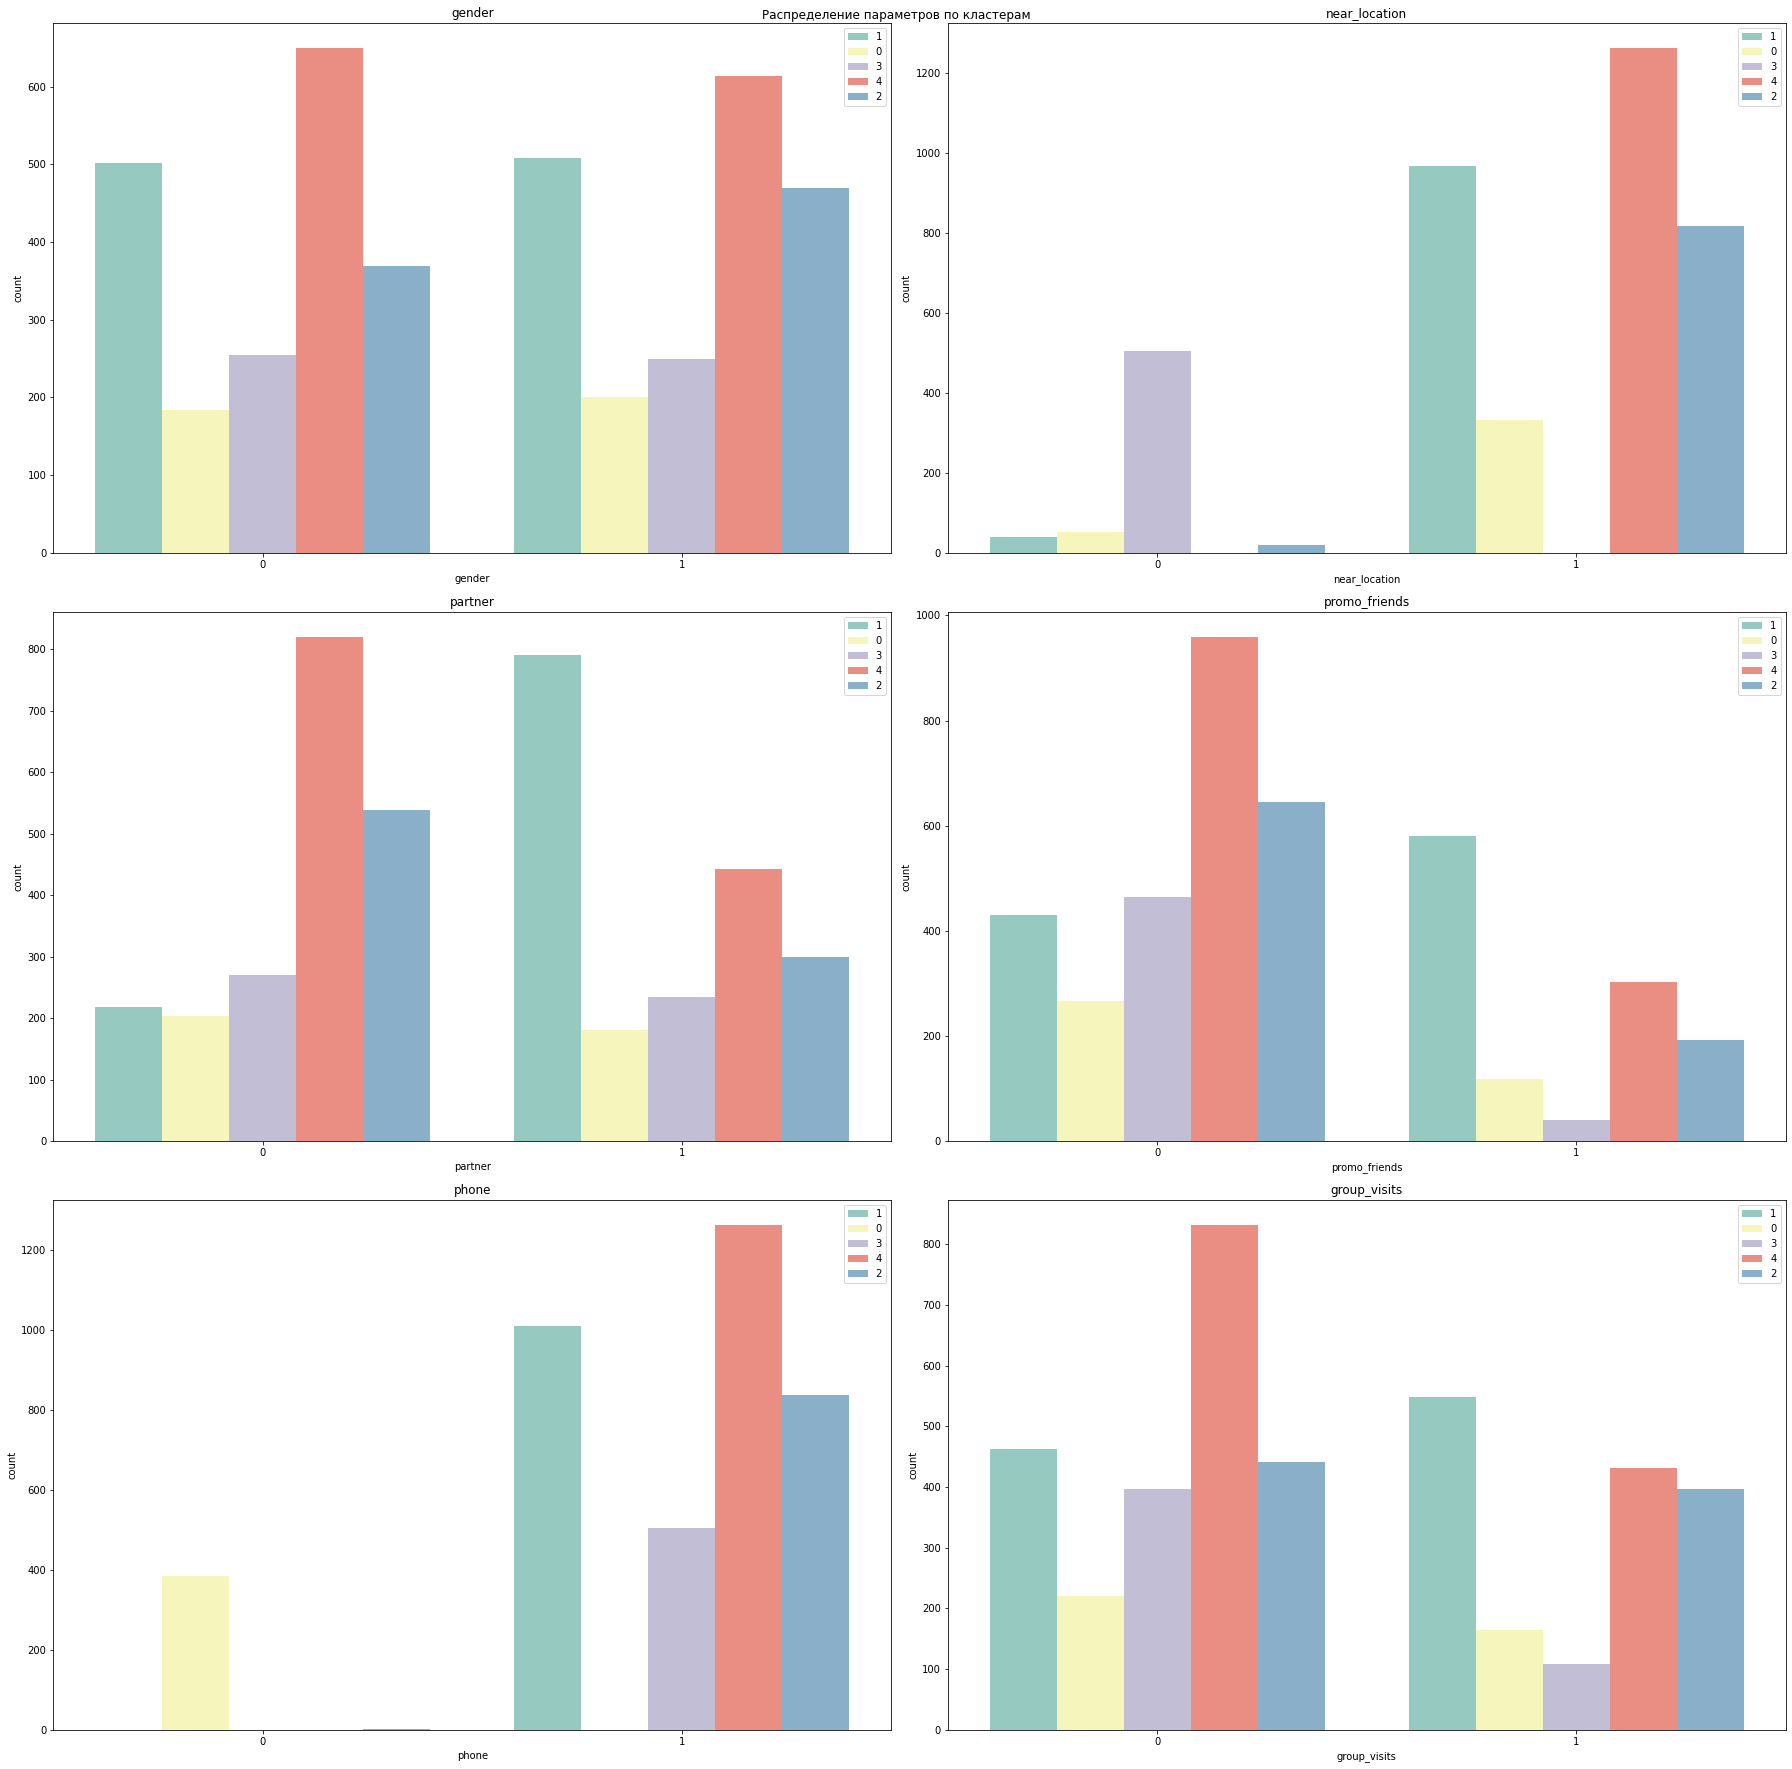

In [16]:
research_for_clusters_discrete = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', "group_visits"]

col_count, row_count = 2, 3

plt.figure(figsize =(25,25))

for i, j in enumerate(research_for_clusters_discrete):
    for cluster in data['cluster_km'].unique():
        sns.countplot(data = data, x=j, hue = 'cluster_km', ax = plt.subplot(row_count, col_count, i+1), palette="Set3")
    plt.title(j)
    plt.legend(data['cluster_km'].unique())
    
plt.suptitle('Распределение параметров по кластерам')

plt.tight_layout()

Графики распределения параметров по кластерам:   
- во всех кластерах почти равномерное распределение по гендеру;   
- самой небольшой отток клиентов у 0 и 4 кластера;   
- lifetime распределён равномерно во всех кластера, но с разной амплитудой;   
- возраст распределён равномерно во всех кластерах;   
- в нулевом кластере сосредоточены преимущественно клиенты с самыми длинными контрактами;   
- клиенты из второго кластера чаще всего посещают групповые занятия.

In [17]:
data.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

Самые надёжные кластеры - 0 и 4.

Исправила.   
  
Исходя из этих кластеров портрет идеального клиента фитнес-центра:   
- живёт или работает в районе расположения фитнес-центра;   
- принимает участие в программах лояльности компаний-партнёров и "Приведи друга";   
- посещяет групповые программы;   
- возраст 29-30 лет;   
- часто пользуется дополнительными услугами в фитнес-центрах;   
- посещают фитнес-центр больше 4-х месяцев и не меньше 2-х раз в неделю;   


## Общий вывод и базовые рекомендации по работе с клиентами
<a id='section_5'></a>

Исходя из этих кластеров портрет идеального клиента фитнес-центра:   
- живёт или работает в районе расположения фитнес-центра;   
- принимает участие в программах лояльности компаний-партнёров и "Приведи друга";   
- посещяет групповые программы;   
- возраст 29-30 лет;   
- часто пользуется дополнительными услугами в фитнес-центрах;   
- посещают фитнес-центр больше 4-х месяцев и не меньше 2-х раз в неделю;

Можно дать следующие рекомендации:    
  
1. Необходимость работы с мотивацией клиентов и выработки у них привычки заниматься физической активностью - характерный вопрос для всей отрасли спорта и велнеса. БОльшая часть крупных игроков рынка решают эту проблему с помощью SMM и ведения медиа о ЗОЖ.   
   
2. БОльшая часть клиентов живут или работают в районах расположения фитнес-центров. Так как нам известны районы расположения фитнес-центров, то можно озаботиться вопросом наружной рекламы и раздачи листовок.   
   
3. Клиенты, которые приобретают абонементы по партнёрским программам компаний, составляют 30% от самых эффективных с точки зрения удержания и оттока кластеров, следовательно нужно продолжать работу в этом направлении.

4. Участие в групповых программах также является фактором удердания клиентов. Вероятнее всего дело в том, что групповые занятие менее интенсивные, чем самостоятельные занятия, и там можно найти поддерживающее коммьюнити.    

5. Использование дополнительных услуг также является фактором продолжительного посещения фитнес-центра - вероятно к комфорту быстро привыкают, поэтому возможно стоит рассмотреть вариант услуг в подарок для тех, кто в первый раз купил абонемент, чтобы у них была возможность попробовать и "пристраститься".